Below is some code to simulate collisions between particles in a closed box

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt


def simpcollision3(A,B,C,colls): #A,B and C refer to the initial number of A,B and C resp. and colls is the number of collisions to simulate
    abc = [A,B,C]
    numbers = (0,1,2)
    
    fails = 0
    for i in range(colls):
        particle1 = random.choices(numbers,abc)
        abc[particle1[0]] += -1
        particle2 = random.choices(numbers,abc)
        abc[particle2[0]] += -1
        particles = [particle1[0],particle2[0]]
        if particle1 != particle2:
            d = (max(particles) + max(particles) - min(particles)) % 3
            abc[d] += 2
        if particles[0] == particles[1]:
            abc[particle1[0]] += 2
            
            fails += 1
    return abc


In [2]:
X = simpcollision3(1000,1000,1000,1000000)
print(X)
X1 = simpcollision3(2000,500,500,1000000)
print(X1)
X2= simpcollision3(1250,1250,500,1000000)
print(X2)
X3= simpcollision3(1000,1000,1000,10000000)
print(X3)

[1002, 948, 1050]
[1001, 965, 1034]
[967, 1024, 1009]
[1005, 1038, 957]


In [3]:
def simpcollision3A(A,B,C,colls): #A,B and C refer to the initial number of A,B and C resp. and colls is the number of collisions to simulate
    abc = [A,B,C]
    numbers = (0,1,2)
    data = []
    step = colls/100
    
    fails = 0
    for i in range(colls+1):
        particle1 = random.choices(numbers,abc)
        abc[particle1[0]] += -1
        particle2 = random.choices(numbers,abc)
        abc[particle2[0]] += -1
        particles = [particle1[0],particle2[0]]
        if particle1 != particle2:
            d = (max(particles) + max(particles) - min(particles)) % 3
            abc[d] += 2
        if particles[0] == particles[1]:
            abc[particle1[0]] += 2
            
            fails += 1
        if i%step == 0:
            data.append(abc[0])
    return data

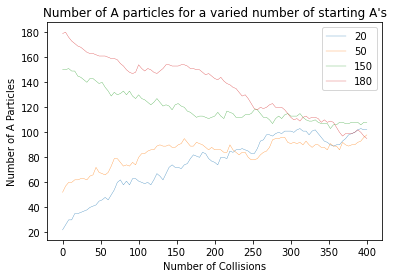

In [4]:
N = 400


y = simpcollision3A(20,140,140,N)
t = np.linspace(0,N,num = 101, endpoint = True)
plt.plot(t,y,linewidth = 0.3, label = "20")

y = simpcollision3A(50,125,125,N)
t = np.linspace(0,N,num = 101, endpoint = True)
plt.plot(t,y,linewidth = 0.3,label = "50")

y = simpcollision3A(150,75,75,N)
t = np.linspace(0,N,num = 101, endpoint = True)
plt.plot(t,y,linewidth = 0.3,label = "150")

y = simpcollision3A(180,60,60,N)
t = np.linspace(0,N,num = 101, endpoint = True)
plt.plot(t,y,linewidth = 0.3,label = "180")

plt.ylabel("Number of A Particles")
plt.xlabel("Number of Collisions")
plt.legend()
plt.title("Number of A particles for a varied number of starting A's")
plt.savefig("first graph01.png",dpi=800)
plt.show()


    

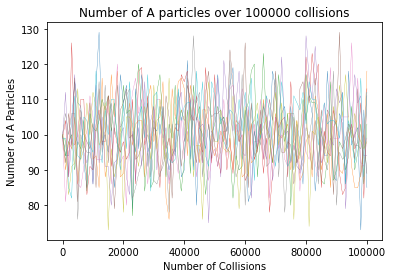

In [5]:




N = 100000
for k in range(10):
    y = simpcollision3A(100,100,100,N)
    t = np.linspace(0,N,num = 101, endpoint = True)
    plt.plot(t,y,linewidth = 0.3)
plt.ylabel("Number of A Particles")
plt.xlabel("Number of Collisions")
plt.title("Number of A particles over 100000 collisions")
plt.savefig("first graph.png", dpi=800)
plt.show()




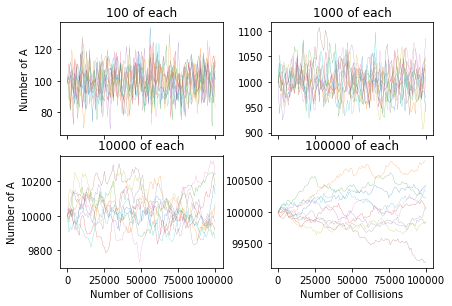

In [6]:
fig, ax = plt.subplots(2,2,sharex=True)
fig.tight_layout()

N = 100000

for k in range(10):
    y = simpcollision3A(100,100,100,N)
    t = np.linspace(0,N,num = 101, endpoint = True)
    ax[0,0].plot(t,y,linewidth = 0.2)
    ax[0,0].set_title('100 of each')
    ax[0,0].set(ylabel="Number of A")



for k in range(10):
    y = simpcollision3A(1000,1000,1000,N)
    t = np.linspace(0,N,num = 101, endpoint = True)
    ax[0,1].plot(t,y,linewidth = 0.2)
    ax[0,1].set_title('1000 of each')



for k in range(10):
    y = simpcollision3A(10000,10000,10000,N)
    t = np.linspace(0,N,num = 101, endpoint = True)
    ax[1,0].plot(t,y,linewidth = 0.2)
    ax[1,0].set_title('10000 of each')
    ax[1,0].set(xlabel="Number of Collisions")
    ax[1,0].set(ylabel="Number of A")


for k in range(10):
    y = simpcollision3A(100000,100000,100000,N)
    t = np.linspace(0,N,num = 101, endpoint = True)
    ax[1,1].plot(t,y,linewidth = 0.2)
    ax[1,1].set_title('100000 of each')
    ax[1,1].set(xlabel="Number of Collisions")
    
    
plt.savefig("second graph.png",dpi = 800)

plt.show()


In [7]:
def weightedcollision3(A,B,C,colls,wA,wB,wC): #A,B and C refer to the initial number of A,B and C resp. and colls is the number of collisions to simulate, wA, wB and wC refer to the weightings of A, B and C resp.
    abc = [A,B,C]
    weights = [wA,wB,wC]
    numbers = (0,1,2)
    dataA = []
    dataB = []
    dataC = []
    fails = 0
    step = colls/100
    for i in range(colls+1):
        particle1 = random.choices(numbers,np.multiply(abc,weights))
        abc[particle1[0]] += -1
        particle2 = random.choices(numbers,np.multiply(abc,weights))
        abc[particle2[0]] += -1
        particles = [particle1[0],particle2[0]]
        if particle1 != particle2:
            d = (max(particles) + max(particles) - min(particles)) % 3
            abc[d] += 2
        if particles[0] == particles[1]:
            abc[particle1[0]] += 2
            
            fails += 1
        if i%step == 0:
            dataA.append(abc[0])
            dataB.append(abc[1])
            dataC.append(abc[2])
    return dataA, dataB, dataC





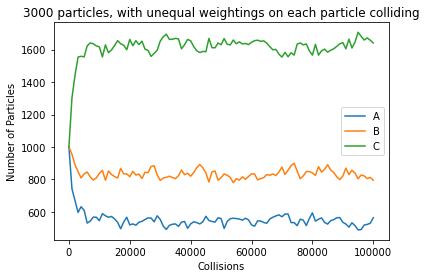

In [8]:

N = 100000
yA, yB, yC = weightedcollision3(1000,1000,1000,N,3,2,1)
xABC = np.linspace(0,N,101,endpoint=True)

plt.plot(xABC,yA,label = "A")
plt.plot(xABC,yB,label = "B")
plt.plot(xABC,yC,label = "C")
plt.legend()
plt.xlabel("Collisions")
plt.ylabel("Number of Particles")
plt.title("3000 particles, with unequal weightings on each particle colliding")

plt.savefig("weighted collisions 1.png", dpi = 800)
plt.show()


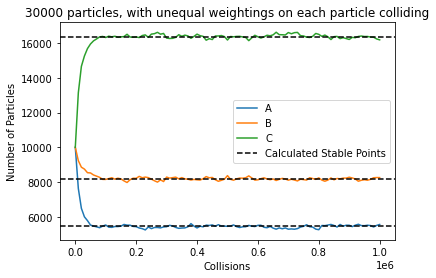

In [9]:
N = 1000000
yA, yB, yC = weightedcollision3(10000,10000,10000,N,3,2,1)
xABC = np.linspace(0,N,101,endpoint=True)

plt.plot(xABC,yA,label = "A")
plt.plot(xABC,yB,label = "B")
plt.plot(xABC,yC,label = "C")


plt.axhline(y=180000/11,color="black",linestyle = "--",label = "Calculated Stable Points")
plt.legend()
plt.axhline(y=90000/11,color="black",linestyle = "--")
plt.axhline(y=60000/11,color="black",linestyle = "--")
plt.xlabel("Collisions")
plt.ylabel("Number of Particles")
plt.title("30000 particles, with unequal weightings on each particle colliding")

plt.savefig("weighted collisions 2.png", dpi = 800)
plt.show()

In [10]:
def simpcollision4A(A,B,C,D,colls): #A,B,C and D refer to the initial number of A,B,C and D resp. and colls is the number of collisions to simulate
    abc = [A,B,C,D]
    numbers = (0,1,2,3)
    data = []
    step = colls/100
    
    fails = 0
    for i in range(colls+1):
        particle1 = random.choices(numbers,abc)
        abc[particle1[0]] += -1
        particle2 = random.choices(numbers,abc)
        abc[particle2[0]] += -1
        particles = [particle1[0],particle2[0]]
        if particle1 != particle2:
            for d in numbers:
                if d != particle1[0] and d != particle2[0]:
                    abc[d] += 1
        if particles[0] == particles[1]:
            abc[particle1[0]] += 2
            
            fails += 1
        if i%step == 0:
            data.append(abc[0])
    return data

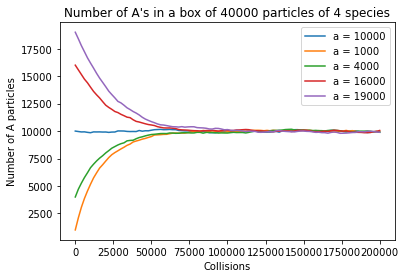

In [11]:
N = 200000

x4 = np.linspace(0,N,101, endpoint=True)
y4a = simpcollision4A(10000,10000,10000,10000,N)
y4b = simpcollision4A(1000,13000,13000,13000,N)
y4c = simpcollision4A(4000,12000,12000,12000,N)
y4d = simpcollision4A(16000,8000,8000,8000,N)
y4e = simpcollision4A(19000,7000,7000,7000,N)


plt.plot(x4,y4a,label = "a = 10000")
plt.plot(x4,y4b,label = "a = 1000")
plt.plot(x4,y4c,label = "a = 4000")
plt.plot(x4,y4d,label = "a = 16000")
plt.plot(x4,y4e,label = "a = 19000")

plt.xlabel("Collisions")
plt.ylabel("Number of A particles")
plt.legend()

plt.title("Number of A's in a box of 40000 particles of 4 species")




plt.savefig("4 Collisions.png",dpi = 800)
plt.show()